In [1]:
import numba
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
@numba.njit
def krasny_velocity(z1,z0,gamma,delta):
    """
    parameters:
    
    z0 : position of the vortex
    z1 : complex point where velocity is to be calculated
    gamma : strength of the vortex placed at z0
    
    Returns:
    vel : velocity at point z1 due to the vortex placed at z0
    """
    
    dz = z1 - z0
    x = dz.real
    y = dz.imag
    
    phi = (gamma/(2*np.pi*(x*x + y*y + delta*delta)))*complex(-y,-x)
    
    u = phi.real
    v = (-1)*phi.imag
    
    return u , v
    

In [3]:
@numba.njit
def krasny_net_velocity(vortex, vortexs, gammas, deltas):
    u = 0
    v = 0
    curr_idx = np.argmin(np.abs(vortexs - vortex))
    for i,z0 in enumerate(vortexs):
        if curr_idx != i :
            u_temp , v_temp  = krasny_velocity(vortex,z0,gammas[i],deltas[i])
            u = u + u_temp
            v = v + v_temp
    return complex(u , v)

In [4]:
@numba.njit
def euler_update( x , v , dt):
    return x + v*dt

In [5]:
@numba.njit
def rk2_update(x,u1,u2,dt):
    return x + (dt/2)*(u1 + u2)

In [6]:
@numba.njit
def simulate(vortexs , gammas , deltas , num_iter , dt ):
    num_vortex = len(vortexs)
    path = np.zeros((num_iter,num_vortex),dtype=np.complex128)
    path[0,:] = vortexs.copy()

    for t in range(num_iter):
        u1 =  np.zeros(num_vortex,dtype=np.complex128)
        u2 = np.zeros(num_vortex,dtype=np.complex128)
        for i,vortex in enumerate(vortexs):
            u1[i] = krasny_net_velocity(vortex,vortexs,gammas,deltas)
            vortex_temp = euler_update(vortex,u1[i],dt)
            u2[i] = krasny_net_velocity(vortex_temp,vortexs,gammas,deltas)
        vortexs = rk2_update(vortexs,u1,u2,dt)
        path[t,:] = vortexs.copy()

    return path

In [7]:
def plot(path):
    plt.scatter(path[:,:].real,path[:,:].imag,'g')

In [9]:
def plot_last(path):
    plt.scatter(path[-1,:].real,path[-1,:].imag,'b')
    plt.scatter(path[0,:].real,path[0,:].imag,'r')

In [ ]:
gamma_net = 
J = 24
d = 0.3
M = 10
x_centre = 
y_centre = 
# total number on the circle + 2 on the centre 
num_vortexs = int((M*J*(J+1))/2 + 2)

vortexs = np.zeros(num_vortexs,dtype=np.complex128)

vortexs[:2] = complex(x_centre,y_centre)

idx = 0
for j in range(1,J+1):
    radius_i = j*d
    for i in range(1,j*M + 1):
        theta_ji = i*((2*np.pi)/(j*M))
        x = x_centre + radius_i*np.cos(theta_ji)
        y = y_centre + radius_i*np.sin(theta_ji)
        vortex[idx + 1] = complex(x,y)

In [41]:
def build_plump(x_centre,y_centre,J=24,d=0.3,M=10):
    num_vortexs = int((M*J*(J+1))/2 + 2)
    vortexs = np.zeros(num_vortexs,dtype=np.complex128)
    vortexs[:2] = complex(x_centre,y_centre)
    idx = 1
    for j in range(1,J+1):
        radius_i = j*d
        for i in range(1,j*M + 1):
            theta_ji = i*((2*np.pi)/(j*M))
            x = x_centre + radius_i*np.cos(theta_ji)
            y = y_centre + radius_i*np.sin(theta_ji)
            vortexs[idx + 1] = complex(x,y)
            idx = idx + 1
    return vortexs

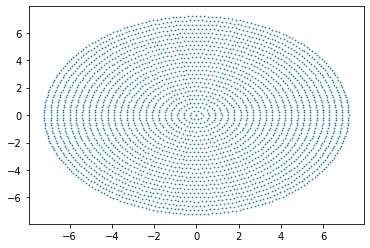

In [43]:
vortex = build_plump(0.0,0.0)
plt.scatter(vortex.real,vortex.imag,s=0.5)

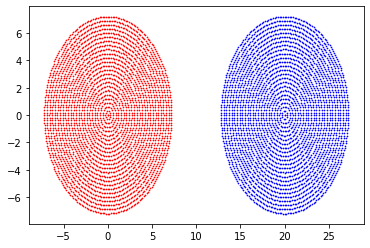

In [51]:
plump_1 = build_plump(0.0,0.0)
plump_2 = build_plump(20.0,0.0)
vortexs = np.concatenate((plump_1,plump_2),axis=0)
plt.scatter(vortexs[:3003].real,vortexs[:3003].imag,color='r',s=0.5)
plt.scatter(vortexs[3003:].real,vortexs[3003:].imag,color='b',s=0.5)

time taken :  656.052077293396


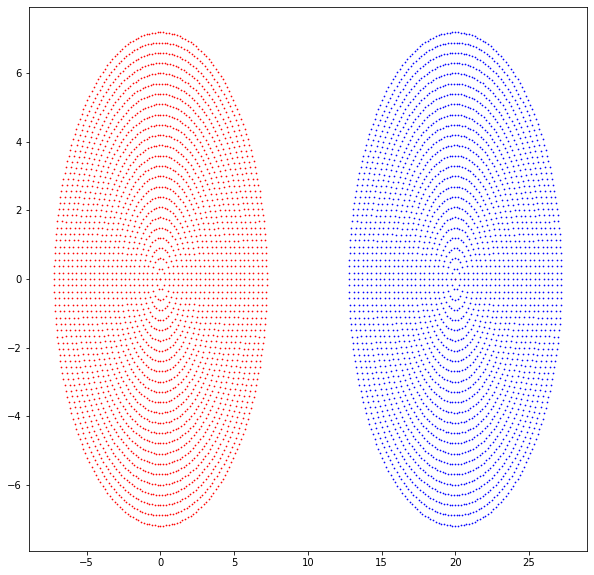

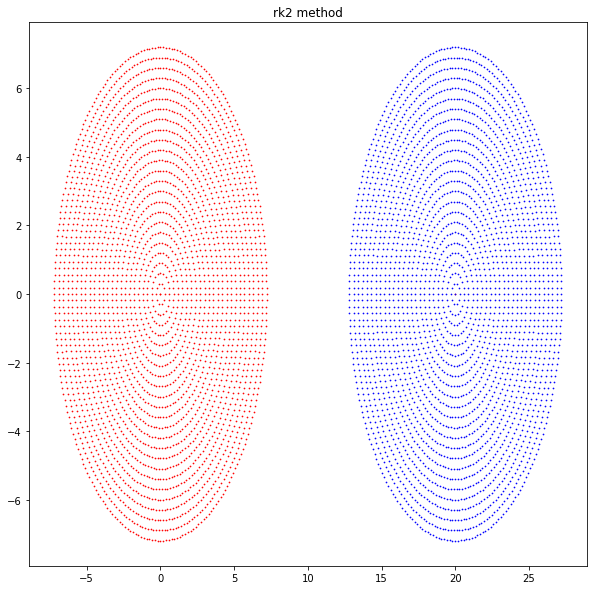

In [52]:
plump_1 = build_plump(0.0,0.0)
plump_2 = build_plump(20.0,0.0)
vortexs = np.concatenate((plump_1,plump_2),axis=0)
plt.figure(figsize=(10,10))
plt.scatter(vortexs[:3003].real,vortexs[:3003].imag,color='r',s=0.5)
plt.scatter(vortexs[3003:].real,vortexs[3003:].imag,color='b',s=0.5)
plt.show()


gamma0 = 4*np.pi/0.682
dt = 16/3002

t = 1
num_iter = int(t/dt)

gammas = np.ones_like(vortexs)*(gamma0/3002)
deltas = np.ones_like(vortexs)*0.05


a = time.time()

plt.figure(figsize=(10,10))
path = simulate(vortexs , gammas , deltas , num_iter , dt)
plt.title("rk2 method")
plt.scatter(vortexs[:3003].real,vortexs[:3003].imag,color='r',s=0.5)
plt.scatter(vortexs[3003:].real,vortexs[3003:].imag,color='b',s=0.5)
plt.show()

print("time taken : ", time.time() - a)

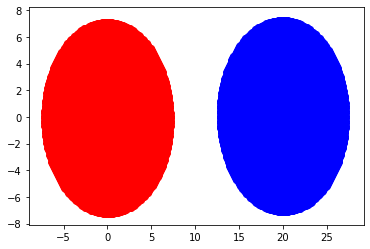

In [59]:
plt.scatter(path[100,:3003].real,path[100,:3003].imag,color='r')
plt.scatter(path[100,3003:].real,path[100,3003:].imag,color='b')

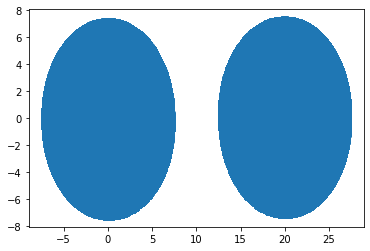

In [62]:
plt.scatter(path.real,path.imag)